# Packages Install

In [72]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot_mpl
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
pd.options.display.max_columns = None

# Datasets Install

In [77]:
df = pd.read_excel("Queensland Plants.xlsx")

pd.options.display.max_columns = None

df.head()

,Kingdom,Sub_Kingdom,Division,Class,SubClass,Order_Name,Group_Name,Family,Botanical_Name,Taxon_Name,Genus,Species,Rank,Infra_Name,Naturalisation_Status,NCA_Status,Curator,Burke,Burnett,Cook,Darling_Downs,Gregory_North,Gregory_South,Leichhardt,Maranoa,Mitchell,Moreton,North_Kennedy,Port_Curtis,South_Kennedy,Warrego,Wide_Bay,Queensland,ACT,NSW,NT,SA,TAS,VIC,WA,Australia,NG,Africa,America,Antarctica,Asia,NZ,Europe,Malesia,Melanesia,Pacific_islands,Notes
0,Chromista,NaN,Bacillariophyta,Bacillariophyceae,Bacillariophycidae,Bacillariales,Algae,Bacillariaceae,Bacillaria paxillifer (O.F.Muell.) Hendey,Bacillaria paxillifer,Bacillaria,paxillifer,Species,NaN,Native to QLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No specimen in BRI
1,Chromista,NaN,Bacillariophyta,Bacillariophyceae,Bacillariophycidae,Bacillariales,Algae,Bacillariaceae,Hantzschia amphioxys (Ehrenb.) Grunov,Hantzschia amphioxys,Hantzschia,amphioxys,Species,NaN,Native to QLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No specimen in BRI
2,Chromista,NaN,Bacillariophyta,Bacillariophyceae,Bacillariophycidae,Bacillariales,Algae,Bacillariaceae,Hantzschia elongata (Hantzsch) Grunov,Hantzschia elongata,Hantzschia,elongata,Species,NaN,Native to QLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No specimen in BRI
3,Chromista,NaN,Bacillariophyta,Bacillariophyceae,Bacillariophycidae,Bacillariales,Algae,Bacillariaceae,Nitzschia acicularis (Kuetz.) W.Sm.,Nitzschia acicularis,Nitzschia,acicularis,Species,NaN,Native to QLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No specimen in BRI
4,Chromista,NaN,Bacillariophyta,Bacillariophyceae,Bacillariophycidae,Bacillariales,Algae,Bacillariaceae,Nitzschia acicularoides Archibald,Nitzschia acicularoides,Nitzschia,acicularoides,Species,NaN,Native to QLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No specimen in BRI


# Initial Data Analysis

In [3]:
df.shape

(17738, 52)

In [4]:
list(df.columns)

['Kingdom',
 'Sub_Kingdom',
 'Division',
 'Class',
 'SubClass',
 'Order_Name',
 'Group_Name',
 'Family',
 'Botanical_Name',
 'Taxon_Name',
 'Genus',
 'Species',
 'Rank',
 'Infra_Name',
 'Naturalisation_Status',
 'NCA_Status',
 'Curator',
 'Burke',
 'Burnett',
 'Cook',
 'Darling_Downs',
 'Gregory_North',
 'Gregory_South',
 'Leichhardt',
 'Maranoa',
 'Mitchell',
 'Moreton',
 'North_Kennedy',
 'Port_Curtis',
 'South_Kennedy',
 'Warrego',
 'Wide_Bay',
 'Queensland',
 'ACT',
 'NSW',
 'NT',
 'SA',
 'TAS',
 'VIC',
 'WA',
 'Australia',
 'NG',
 'Africa',
 'America',
 'Antarctica',
 'Asia',
 'NZ',
 'Europe',
 'Malesia',
 'Melanesia',
 'Pacific_islands',
 'Notes']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17738 entries, 0 to 17737
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kingdom                17738 non-null  object 
 1   Sub_Kingdom            14003 non-null  object 
 2   Division               17738 non-null  object 
 3   Class                  17738 non-null  object 
 4   SubClass               17057 non-null  object 
 5   Order_Name             17738 non-null  object 
 6   Group_Name             17738 non-null  object 
 7   Family                 17738 non-null  object 
 8   Botanical_Name         17738 non-null  object 
 9   Taxon_Name             17738 non-null  object 
 10  Genus                  17738 non-null  object 
 11  Species                17738 non-null  object 
 12  Rank                   17734 non-null  object 
 13  Infra_Name             1718 non-null   object 
 14  Naturalisation_Status  17734 non-null  object 
 15  NC

In [82]:
# Each Variable has how much precent of Null values?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    pct_missing = round(pct_missing, 2)
    print(f"{col} - {pct_missing*100}%")

Kingdom - 0.0%
Sub_Kingdom - 21.0%
Division - 0.0%
Class - 0.0%
SubClass - 4.0%
Order_Name - 0.0%
Group_Name - 0.0%
Family - 0.0%
Botanical_Name - 0.0%
Taxon_Name - 0.0%
Genus - 0.0%
Species - 0.0%
Rank - 0.0%
Infra_Name - 90.0%
Naturalisation_Status - 0.0%
NCA_Status - 94.0%
Curator - 5.0%
Burke - 85.0%
Burnett - 82.0%
Cook - 53.0%
Darling_Downs - 76.0%
Gregory_North - 92.0%
Gregory_South - 94.0%
Leichhardt - 82.0%
Maranoa - 88.0%
Mitchell - 87.0%
Moreton - 62.0%
North_Kennedy - 69.0%
Port_Curtis - 77.0%
South_Kennedy - 78.0%
Warrego - 89.0%
Wide_Bay - 76.0%
Queensland - 94.0%
ACT - 97.0%
NSW - 72.0%
NT - 82.0%
SA - 91.0%
TAS - 96.0%
VIC - 92.0%
WA - 88.0%
Australia - 98.0%
NG - 88.0%
Africa - 98.0%
America - 93.0%
Antarctica - 100.0%
Asia - 95.0%
NZ - 98.0%
Europe - 97.0%
Malesia - 92.0%
Melanesia - 93.0%
Pacific_islands - 96.0%
Notes - 89.0%


### Individual Qualitative Variables

c:\users\melo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



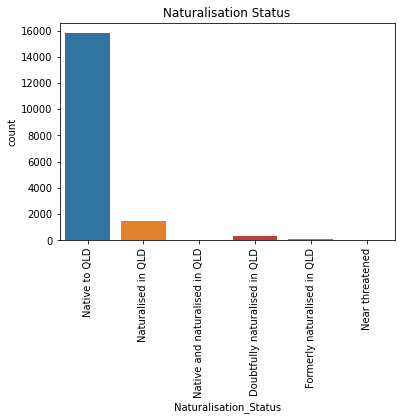

In [40]:
ax = sns.countplot("Naturalisation_Status", data = df)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.title("Naturalisation Status")

plt.show()

# Most of the plants in the dataset are native to QLD

c:\users\melo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



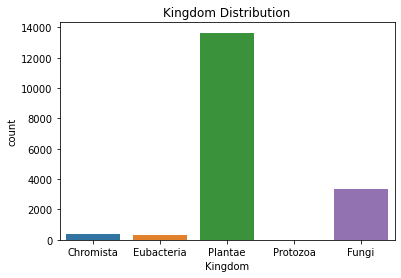

In [26]:
sns.countplot("Kingdom", data = df)

plt.title("Kingdom Distribution")

plt.show()

c:\users\melo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



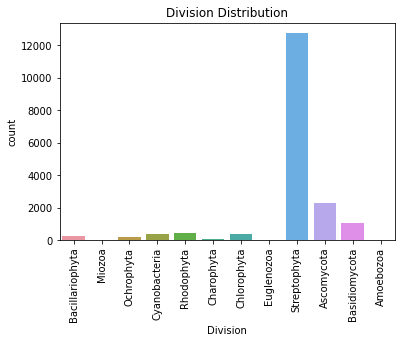

In [30]:
ax = sns.countplot("Division", data = df)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.title("Division Distribution")

plt.show()

c:\users\melo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



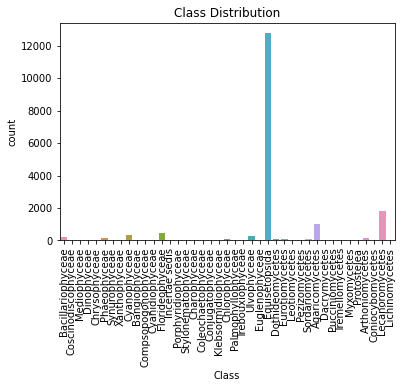

In [33]:
ax = sns.countplot("Class", data = df)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.title("Class Distribution")

plt.show()

### Individual Quantitative Variables

In [6]:
df.describe()

,Burnett,Cook,Darling_Downs,Gregory_North,Gregory_South,Leichhardt,Maranoa,Mitchell,Moreton,North_Kennedy,...,NG,Africa,America,Antarctica,Asia,NZ,Europe,Malesia,Melanesia,Pacific_islands
count,3106.000000,8359.000000,4285.000000,1414.000000,1110.000000,3244.000000,2096.000000,2245.000000,6697.000000,5574.000000,...,2204.000000,420.000000,1156.000000,1.0,916.000000,352.000000,573.000000,1353.000000,1159.000000,690.000000
mean,5.415325,18.123579,8.957993,8.397454,5.798198,8.618681,5.684637,6.576837,12.518441,8.385361,...,9.031760,3.485714,2.738754,1.0,2.260917,2.127841,2.413613,3.312639,3.462468,2.555072
std,6.441718,25.582862,11.868684,9.206471,6.294457,10.898253,6.750676,8.194548,16.464454,10.558836,...,12.159363,5.334383,3.120537,NaN,1.931233,1.977975,2.303454,3.614234,3.561223,2.689659
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,7.000000,4.000000,5.000000,3.000000,4.000000,3.000000,3.000000,6.000000,4.000000,...,4.000000,1.000000,2.000000,1.0,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
75%,7.000000,25.000000,12.000000,12.000000,8.000000,12.000000,7.000000,8.000000,18.000000,11.000000,...,11.000000,3.000000,3.000000,1.0,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,296.000000,130.000000,96.000000,50.000000,125.000000,106.000000,62.000000,238.000000,153.000000,...,106.000000,46.000000,37.000000,1.0,17.000000,14.000000,16.000000,35.000000,28.000000,36.000000


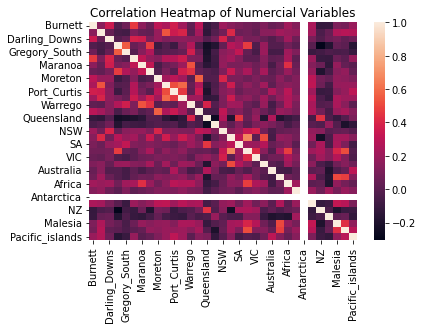

<Figure size 6000x6000 with 0 Axes>

In [10]:
correlation_matrix = df.corr(method = "pearson")

sns.heatmap(correlation_matrix)

plt.title("Correlation Heatmap of Numercial Variables")

plt.figure(figsize=(10, 10), dpi=600)

plt.show()

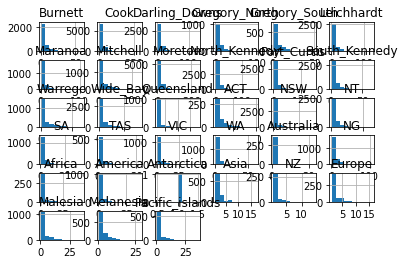

<Figure size 576x432 with 0 Axes>

In [8]:
df.hist()
plt.figure(figsize=(8, 6))
plt.show()

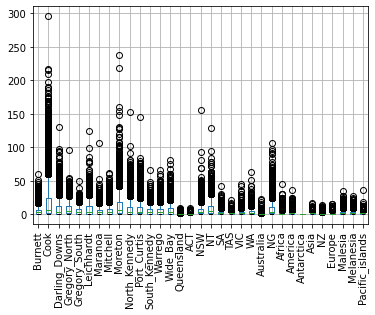

<Figure size 576x432 with 0 Axes>

In [9]:
df.boxplot()
plt.xticks(rotation = 90)
plt.figure(figsize=(8, 6))
plt.show()

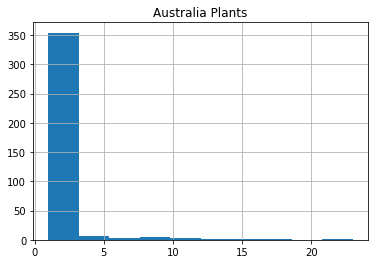

In [18]:
# Australia Plants

df["Australia"].hist()
plt.title("Australia Plants")
plt.show()

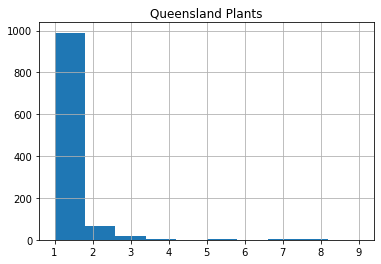

In [21]:
# Queensland

df["Queensland"].hist()
plt.title("Queensland Plants")
plt.show()

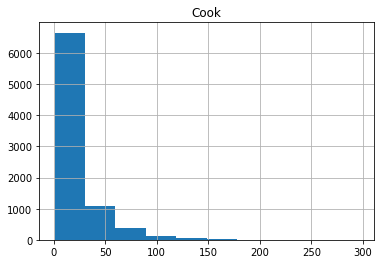

In [13]:
# "Cook" is the most common numerical variable in the dataset with least null values

df["Cook"].hist()
plt.title("Cook")
plt.show()

### 2+ Quantitative Variables

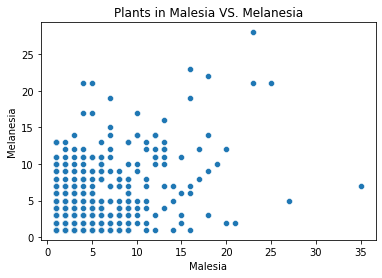

In [44]:
sns.scatterplot(x = "Malesia", y = "Melanesia", data = df)

plt.title("Plants in Malesia VS. Melanesia")

plt.show()

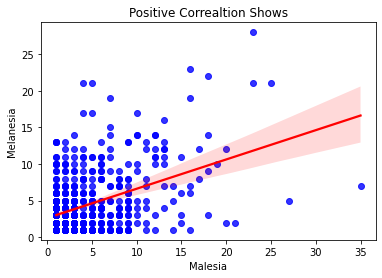

In [46]:
sns.regplot(x = "Malesia", y = "Melanesia", data = df, scatter_kws = {"color": "blue"}
           , line_kws = {"color": "red"})

plt.title("Positive Correaltion Shows")

plt.show()

# Meaning the enviornmental conditions are similar in Malesia and Malanesia

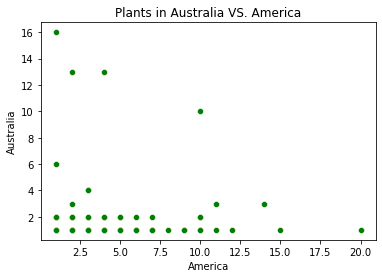

In [51]:
sns.scatterplot(x = "America", y = "Australia", data = df, color = "green")

plt.title("Plants in Australia VS. America")

plt.show()

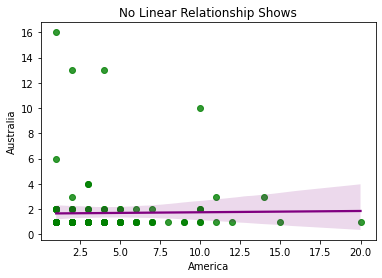

In [52]:
sns.regplot(x = "America", y = "Australia", data = df, scatter_kws = {"color": "green"}
           , line_kws = {"color": "purple"})

plt.title("No Linear Relationship Shows")

plt.show()

### Combianed Variables

In [53]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,Kingdom,Sub_Kingdom,Division,Class,SubClass,Order_Name,Group_Name,Family,Botanical_Name,Taxon_Name,...,Africa,America,Antarctica,Asia,NZ,Europe,Malesia,Melanesia,Pacific_islands,Notes
0,0,-1,2,2,4,21,0,76,1825,1826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
1,0,-1,2,2,4,21,0,76,8196,8194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
2,0,-1,2,2,4,21,0,76,8197,8195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
3,0,-1,2,2,4,21,0,76,11367,11365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
4,0,-1,2,2,4,21,0,76,11368,11366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17733,3,3,11,17,37,211,8,686,573,574,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-1
17734,3,3,11,17,37,211,8,686,574,575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
17735,3,3,11,17,37,211,8,686,14772,14770,...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-1
17736,3,3,11,17,37,211,8,686,14773,14771,...,NaN,NaN,NaN,NaN,2.0,NaN,5.0,21.0,2.0,-1


In [54]:
df_numerized.corr()

,Kingdom,Sub_Kingdom,Division,Class,SubClass,Order_Name,Group_Name,Family,Botanical_Name,Taxon_Name,...,Africa,America,Antarctica,Asia,NZ,Europe,Malesia,Melanesia,Pacific_islands,Notes
Kingdom,1.000000,0.764884,0.730175,0.181137,0.204189,-0.015415,-0.252318,-0.037435,-0.087019,-0.087105,...,0.084957,0.126793,NaN,0.035077,0.108859,0.209761,0.069781,0.100645,0.039618,-0.453548
Sub_Kingdom,0.764884,1.000000,0.909622,0.148347,0.213380,0.042470,-0.516664,-0.048840,-0.080806,-0.080905,...,0.080724,0.193409,NaN,0.028485,0.129981,0.250770,0.073347,0.128460,0.022995,-0.323008
Division,0.730175,0.909622,1.000000,0.080283,0.306806,-0.008042,-0.557496,-0.056735,-0.091960,-0.092058,...,0.084020,0.188962,NaN,0.040164,0.119724,0.238319,0.070972,0.109710,0.025661,-0.356940
Class,0.181137,0.148347,0.080283,1.000000,0.257530,0.168735,0.051257,0.071839,0.031807,0.031792,...,-0.041613,-0.041765,NaN,-0.046553,-0.075041,0.077889,-0.038460,-0.042282,-0.047540,0.004807
SubClass,0.204189,0.213380,0.306806,0.257530,1.000000,0.253589,0.053901,0.055932,0.003004,0.002703,...,-0.019458,0.080445,NaN,-0.011426,0.191698,0.080911,-0.004356,0.051498,0.031706,-0.091198
Order_Name,-0.015415,0.042470,-0.008042,0.168735,0.253589,1.000000,0.141497,0.457700,0.083117,0.082939,...,0.189469,0.043063,NaN,0.079154,0.105129,0.015653,0.103322,0.134648,0.081966,0.058721
Group_Name,-0.252318,-0.516664,-0.557496,0.051257,0.053901,0.141497,1.000000,0.050598,0.049705,0.049206,...,-0.109833,-0.111360,NaN,-0.058375,0.171119,-0.160848,-0.054489,0.000084,0.035782,0.231964
Family,-0.037435,-0.048840,-0.056735,0.071839,0.055932,0.457700,0.050598,1.000000,0.214096,0.214355,...,0.159107,0.056642,NaN,0.054425,0.006252,0.020943,0.047728,0.042899,0.079015,0.012104
Botanical_Name,-0.087019,-0.080806,-0.091960,0.031807,0.003004,0.083117,0.049705,0.214096,1.000000,0.999719,...,-0.016845,-0.029367,NaN,-0.047652,0.036049,-0.019437,-0.014836,-0.007607,0.006739,0.018526
Taxon_Name,-0.087105,-0.080905,-0.092058,0.031792,0.002703,0.082939,0.049206,0.214355,0.999719,1.000000,...,-0.016851,-0.029364,NaN,-0.047658,0.036049,-0.019422,-0.014847,-0.007616,0.006739,0.018586


In [57]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Kingdom  Kingdom            1.000000
         Sub_Kingdom        0.764884
         Division           0.730175
         Class              0.181137
         SubClass           0.204189
                              ...   
Notes    Europe            -0.066826
         Malesia           -0.040501
         Melanesia         -0.065208
         Pacific_islands   -0.046771
         Notes              1.000000
Length: 2704, dtype: float64

In [61]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

Kingdom          Kingdom          1.0
Moreton          Moreton          1.0
Leichhardt       Leichhardt       1.0
Gregory_South    Gregory_South    1.0
Gregory_North    Gregory_North    1.0
                                 ... 
Europe           Antarctica       NaN
Malesia          Antarctica       NaN
Melanesia        Antarctica       NaN
Pacific_islands  Antarctica       NaN
Notes            Antarctica       NaN
Length: 2704, dtype: float64

In [86]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr = high_corr[(high_corr) != 1]

high_corr

# There are strong relationships between these qualitative variables
# While we were analysising the individual qualitative variable, we focused on the "Kingdom", "Division", "Class"
# Now we can see the Kingdom and Divison have strong relationship between each other but not the Class

Botanical_Name  Taxon_Name        0.999719
Taxon_Name      Botanical_Name    0.999719
                Genus             0.998249
Genus           Taxon_Name        0.998249
Botanical_Name  Genus             0.998174
Genus           Botanical_Name    0.998174
Division        Sub_Kingdom       0.909622
Sub_Kingdom     Division          0.909622
                Kingdom           0.764884
Kingdom         Sub_Kingdom       0.764884
Infra_Name      Rank              0.760799
Rank            Infra_Name        0.760799
Division        Kingdom           0.730175
Kingdom         Division          0.730175
TAS             NT                0.673309
NT              TAS               0.673309
South_Kennedy   North_Kennedy     0.589883
North_Kennedy   South_Kennedy     0.589883
Moreton         Wide_Bay          0.562835
Wide_Bay        Moreton           0.562835
Gregory_North   Gregory_South     0.548263
Gregory_South   Gregory_North     0.548263
Cook            North_Kennedy     0.536613
North_Kenne

<function matplotlib.pyplot.show(close=None, block=None)>

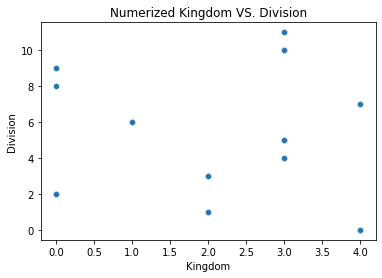

In [88]:
sns.scatterplot(x = "Kingdom", y = "Division", data = df_numerized)

plt.title("Numerized Kingdom VS. Division")

plt.show

In [90]:
px.scatter_3d(df_numerized, x = "Kingdom", y = "Division", z = "Class", color = "Class", title = "Kingdom Division Class Correaltion")

# Regression

## Try to predict the Kingdom by all other attributes

### Linear Regression Model

In [92]:
df_numerized.nunique()

Kingdom                      5
Sub_Kingdom                  5
Division                    12
Class                       41
SubClass                    46
Order_Name                 255
Group_Name                   9
Family                     816
Botanical_Name           17738
Taxon_Name               17735
Genus                     3878
Species                  10076
Rank                         6
Infra_Name                1356
Naturalisation_Status        7
NCA_Status                   8
Curator                     53
Burke                       91
Burnett                     47
Cook                       168
Darling_Downs               79
Gregory_North               49
Gregory_South               33
Leichhardt                  67
Maranoa                     40
Mitchell                    50
Moreton                    110
North_Kennedy               75
Port_Curtis                 72
South_Kennedy               40
Warrego                     48
Wide_Bay                    58
Queensla

In [94]:
df_numerized = df_numerized.fillna(-1)

x = df_numerized.drop(columns = "Kingdom")
y = df_numerized["Kingdom"]

In [96]:
x = pd.get_dummies(x, drop_first = True)
x.head()

,Sub_Kingdom,Division,Class,SubClass,Order_Name,Group_Name,Family,Botanical_Name,Taxon_Name,Genus,Species,Rank,Infra_Name,Naturalisation_Status,NCA_Status,Curator,Burke,Burnett,Cook,Darling_Downs,Gregory_North,Gregory_South,Leichhardt,Maranoa,Mitchell,Moreton,North_Kennedy,Port_Curtis,South_Kennedy,Warrego,Wide_Bay,Queensland,ACT,NSW,NT,SA,TAS,VIC,WA,Australia,NG,Africa,America,Antarctica,Asia,NZ,Europe,Malesia,Melanesia,Pacific_islands,Notes
0,-1,2,2,4,21,0,76,1825,1826,367,6522,1,-1,3,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22
1,-1,2,2,4,21,0,76,8196,8194,1652,369,1,-1,3,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22
2,-1,2,2,4,21,0,76,8197,8195,1652,2948,1,-1,3,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22
3,-1,2,2,4,21,0,76,11367,11365,2474,44,1,-1,3,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22
4,-1,2,2,4,21,0,76,11368,11366,2474,45,1,-1,3,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [104]:
LR = LinearRegression()

LR.fit(x_train, y_train)

linear_prediction = LR.predict(x_test)

mae = mean_absolute_error(y_test, linear_prediction)

In [107]:
score = LR.score(x_test, y_test)

print(f"The R-Sqaure Value of the regression model is {score}\n")
print(f"The Mean Absolute Error of the regression model is {mae}")

The R-Sqaure Value of the regression model is 0.7218202254919792

The Mean Absolute Error of the regression model is 0.20212943571018338


### Random Forest

In [110]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)

RF_prediction = RF.predict(x_test)

mae = mean_absolute_error(y_test, RF_prediction)

In [111]:
score = RF.score(x_test, y_test)

print(f"The R-Sqaure Value of the RandomForest model is {score}\n")
print(f"The Mean Absolute Error of the RandomForest model is {mae}")

The R-Sqaure Value of the RandomForest model is 0.9994875298940895

The Mean Absolute Error of the RandomForest model is 0.0010249402118209772


### XGBoost

In [112]:
XGB = XGBRegressor()

XGB.fit(x_train, y_train)

XGB_prediction = XGB.predict(x_test)

mae = mean_absolute_error(y_test, XGB_prediction)

In [113]:
score = XGB.score(x_test, y_test)

print(f"The R-Sqaure Value of the XGBoost model is {score}\n")
print(f"The Mean Absolute Error of the XGBoost model is {mae}")

The R-Sqaure Value of the XGBoost model is 0.9999997664890204

The Mean Absolute Error of the XGBoost model is 1.2786321349267382e-05


In [ ]:
# XGBoost returns the highest R-squared value and the lowest MAE value within all models, which means it is the best model to predict
# the "Kingdom" attribute of the plant by its other features